<left>
    <h2> Text Mining  </h2>
    <h3> Exercise 1 </h3>
    <h4> Professor: Nandan </h4>
    <h4> Author: Kostis </h4>
</left>

In [3]:
'''Load Libraries'''
import pandas as pd
pd.set_option('max_colwidth', 80)

from re import sub, split

from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE # t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results
from sklearn.manifold import MDS  # Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import spacy

import seaborn as sns

In [153]:
def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d


def clean_twitter(s):
    """ Cleans Twitter specific issues
    
    Should probably clean out mentions, URLs, and RT's.
    """
    # Remove Emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    s = emoji_pattern.sub(r'', str(s)) # no emoji
    
    s = re.sub("RT*","", str(s)) # Remove Retweets RT
    s = re.sub("@\S*","", str(s)) # Remove users and mentions
    s = re.sub("http\S*","", str(s)) # Remove links
    s = re.sub('[#:;,.\'""!\s]',' ', str(s)) # remove special caracters
    
    # Using spaCy
    nlp = spacy.load("en")
    doc = nlp(s)
    
    # ⁉️ Question for Nandan: What's the pb?
    #names = str(list(doc.ents)) # Collect names
    # Replace names 
    #s = [token.lemma_ if token not in names else '[NAMED]' for token in doc]
    
    # Lemmatizing
    s = ' '.join([token.lemma_ for token in doc])
    return s


#⁉️ Question for Nandan: How I make DemocratsPartyOfHate --> Democrats Party Of Hate

In [4]:
X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label

In [5]:
type(X)

pandas.core.series.Series

In [155]:
X.map(clean_twitter)

0          here s cnn on sharia law   -PRON- can be stone or have -PRON- hand cut of...
1          look obama clinton crony illegally arm & amp   train muslim terrorist inc...
2           throwbackthursday   bengarrison   cartoon from 2013   obama get crown   ...
3                     say   islam be peace    or else     trump   maga   isis   tcot   
4                                              all aboard the trump train    choochoo  
5           flashback & gt & gt   judicial watch eleas huma abedin deposition testimony
6          follow fbi presser    say " the system be rig "   & amp    weigh in   fox...
7                                          trump    -PRON- re unn against a igg press  
8          literally 98 % of hillary supporter -PRON- see online be astroturf spamme...
9                                                                           islam      
10           psycho - mothe hillary at -PRON- most evil     maga    basketofdeplorab...
11         the unthinkable have 

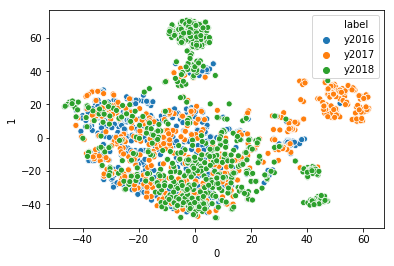

In [156]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

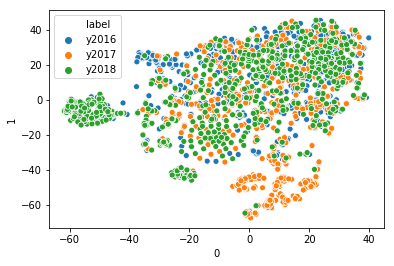

In [157]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

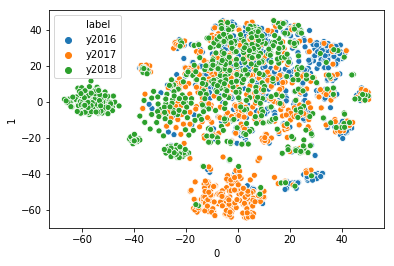

In [158]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
# Can you get things to separate in the space in a better way? 
vectorizer = TfidfVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

## Play with re

In [14]:
'''re Basics'''

### Identifiers:
# \ used to escape a character
# \d any number
# \D anything but a number
# \s space
# \S anything but a space
# \w any character
# \W anything but a character
# . any character except a new line
# \. actually a period
# \b whitespace around words

### Modifiers:
# {1,3} we're expecting 1-3
# + Match 1 or more: Causes the resulting RE to match 1 or more repetitions of the preceding RE. ab+ will match ‘a’ followed by any non-zero number of ‘b’s; it will not match just ‘a’.
# ? Match 0 or 1: Causes the resulting RE to match 0 or 1 repetitions of the preceding RE. ab? will match either ‘a’ or ‘ab’.
# * Match 0 or more: Causes the resulting RE to match 0 or more repetitions of the preceding RE, as many repetitions as are possible. ab* will match ‘a’, ‘ab’, or ‘a’ followed by any number of ‘b’s.
# $ match the end of a string
# ^ match the beginning of a string
# | matches either or e.g. \d{1-3}|\w{5-6}
# [] Match range or "variance" e.g. [A-Za-z] or [1-5a-qA-Z]
# {x} expecting "x" amount

### White Space Characters:
# \n new line
# \s space
# \t tab
# \e escape (rare)
# \f form feed (rare)
# \r return

### DON'T FORGET!:
# . + * ? [ ] $ ^ ( ) { } \ |

're Basics'

In [73]:
exampleString = "Jessica is 15 years old, and Daniel is 27 years old. Edward is 97, and his grandfather, Oscar, is 102"

In [74]:
'''Looking for'''
ages = re.findall("\d{1,3}", exampleString) # return all digits of lenght [1,3], search on the example string 

names = re.findall("[A-Z][a-z]*", exampleString) # >> anything starting by capital A-Z, then a-z and stop when I find something else (*)

print(ages)
print(names)

['15', '27', '97', '102']
['Jessica', 'Daniel', 'Edward', 'Oscar']


In [75]:
ageDict = {}
x = 0
for eachName in names:
    ageDict[eachName] = ages[x]
    x+=1
    
ageDict

{'Jessica': '15', 'Daniel': '27', 'Edward': '97', 'Oscar': '102'}

## Play with TfidfVectorizer, CountVectorizer

In [23]:
'''CountVecotrizer'''
corpus = ['This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?', ]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X.toarray())  

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [27]:
'''TfidfVectorizer''' # Equivalent to CountVectorizer followed by TfidfTransformer.
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]
